# EDA and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer

### Reading the total posts data

In [2]:
posts = pd.read_csv("../data/posts_from_reddit.csv")

In [3]:
posts.shape

(10400, 2)

### Looking for missing data

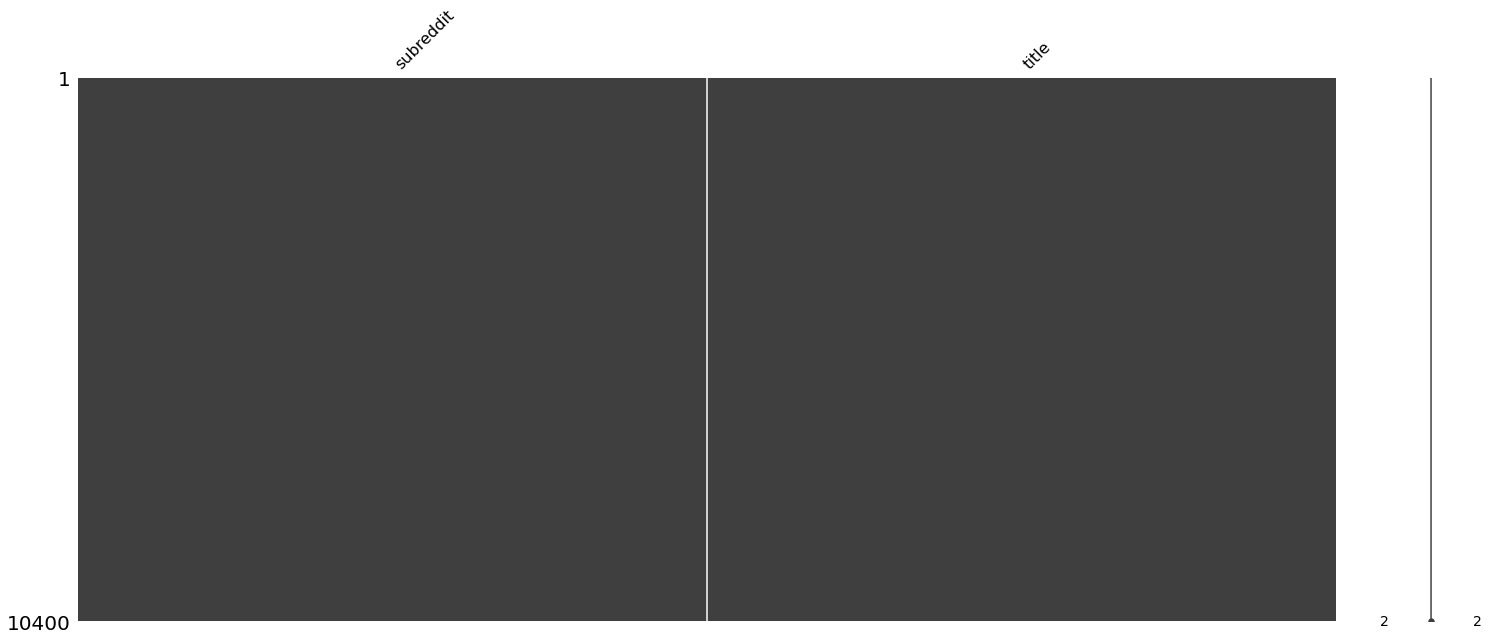

In [4]:
msno.matrix(posts);

In [5]:
posts.isnull().sum()

subreddit    0
title        0
dtype: int64

There is no missing data in the posts dataframe

In [6]:
posts["subreddit"].value_counts()

explainlikeimfive    5200
AmItheAsshole        5200
Name: subreddit, dtype: int64

In [7]:
#changing the subbreddit column from aita and eli5 to 0 and 1 respectfully
posts["subreddit"] = posts['subreddit'].map({"AmItheAsshole":0,"explainlikeimfive":1})

In [8]:
posts["subreddit"].value_counts()

1    5200
0    5200
Name: subreddit, dtype: int64

In [9]:
#code from Noah C on adding to stopwords list
#using the nltk stopword list
stopwords = nltk.corpus.stopwords.words('english')
# adding eli5, aita, and wibta to the stopwords
stopwords.extend(['eli5','aita','wibta','friend'])

In [10]:
X = posts["title"]
y = posts["subreddit"]

In [11]:
cvec_nostopwords = CountVectorizer(stop_words=None)

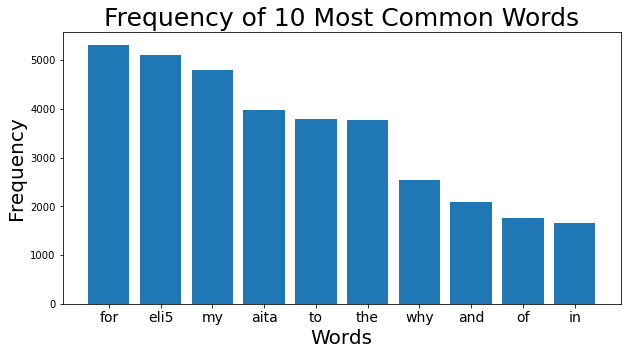

In [72]:
X_nostop = cvec_nostopwords.fit_transform(X)

X_nostop_df = pd.DataFrame(X_nostop.toarray(),columns=cvec_nostopwords.get_feature_names())

# empty list of top words
top_words_nostop = {}

for i in X_nostop_df.columns:
    top_words_nostop[i] = X_nostop_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_nostop = pd.DataFrame(sorted(top_words_nostop.items(), key = lambda x: x[1], reverse = True))

fig , ax = plt.subplots(1,1,figsize = (10, 5))
# visualize top 10 words
chart = plt.bar(most_freq_nostop[0][:10],most_freq_nostop[1][:10])
plt.xlabel("Words",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.title("Frequency of 10 Most Common Words", fontsize=25)
plt.xticks(fontsize=14);

### All of the top 20 words are common stopwords. "eli5" and "aita" often are included in the title posts as convention for each subreddit respectfully. These common words should be removed to get a more realistic data set to see if the subreddit can be predicted using other words

In [69]:
cvec = CountVectorizer(stop_words=stopwords)

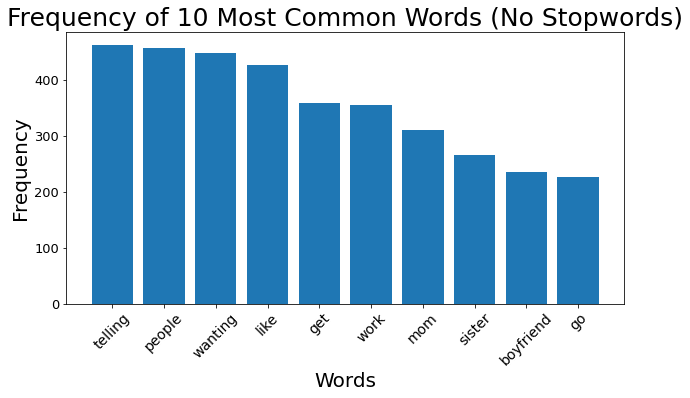

In [79]:
X_tokens = cvec.fit_transform(X)

X_df = pd.DataFrame(X_tokens.toarray(),columns=cvec.get_feature_names())

# empty list of top words
top_words = {}

for i in X_df.columns:
    top_words[i] = X_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))
# visualize top 10 words
plt.bar(most_freq[0][:10],most_freq[1][:10])
plt.xlabel("Words",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.title("Frequency of 10 Most Common Words (No Stopwords)", fontsize=25)
plt.yticks(fontsize=13)
plt.xticks(rotation=45,fontsize=14);

### Exporting Cleaned Reddit Posts

In [ ]:
posts.to_csv("../data/cleaned_reddit_posts.csv")